In [54]:
import pandas as pd

In [55]:
traffic = pd.read_csv('C:\\Users\\xpro\\Downloads\\TrafficViolation.csv')
traffic.info()

C:\Users\xpro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292399 entries, 0 to 1292398
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1292399 non-null  object 
 1   Time Of Stop             1292399 non-null  object 
 2   Agency                   1292399 non-null  object 
 3   SubAgency                1292389 non-null  object 
 4   Description              1292390 non-null  object 
 5   Location                 1292397 non-null  object 
 6   Latitude                 1197045 non-null  float64
 7   Longitude                1197045 non-null  float64
 8   Accident                 1292399 non-null  object 
 9   Belts                    1292399 non-null  object 
 10  Personal Injury          1292399 non-null  object 
 11  Property Damage          1292399 non-null  object 
 12  Fatal                    1292399 non-null  object 
 13  Commercial License       1292399 non-null 

In [56]:
traffic = traffic.rename(columns={'Date Of Stop':'Date', 'Time Of Stop':'Time', })
traffic

,Date,Time,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292394,12/14/2012,23:56:00,MCP,Headquarters and Special Operations,Stop Lights,LOST KNOFE RD/ MVA,39.156846,-77.202903,No,No,...,64*,NaN,No,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(39.1568459666667, -77.2029032166667)"
1292395,12/15/2012,00:11:00,MCP,Headquarters and Special Operations,Headlights,MIDCOUNTY HWY/ MILLER FALL DR,39.143137,-77.158675,No,No,...,55*,NaN,No,HISPANIC,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1431373333333, -77.1586750333333)"
1292396,12/15/2012,00:30:00,MCP,Headquarters and Special Operations,Stop Lights,270/ MVA,39.152770,-77.220292,No,No,...,64*,NaN,No,WHITE,F,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1527700833333, -77.2202923833333)"
1292397,12/16/2012,22:55:00,MCP,Headquarters and Special Operations,Tag Lights,MD 97/ ASPEN HILL RD,39.080061,-77.074347,No,No,...,65*,NaN,No,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0800610666667, -77.0743472)"


In [89]:
#cleaning here
traffic = traffic.drop(['Agency','SubAgency','Location','Work Zone','HAZMAT','Commercial Vehicle',
                        'State','Driver State','DL State','VehicleType','Make','Model','Color',
                        'Contributed To Accident','Arrest Type','Geolocation'], axis=1)
#traffic.dropna(inplace=True)

In [90]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292399 entries, 0 to 1292398
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Date                1292399 non-null  object        
 1   Time                1292399 non-null  object        
 2   Description         1292390 non-null  object        
 3   Latitude            1197045 non-null  float64       
 4   Longitude           1197045 non-null  float64       
 5   Accident            1292399 non-null  object        
 6   Belts               1292399 non-null  object        
 7   Personal Injury     1292399 non-null  object        
 8   Property Damage     1292399 non-null  object        
 9   Fatal               1292399 non-null  object        
 10  Commercial License  1292399 non-null  object        
 11  Alcohol             1292399 non-null  object        
 12  Belts_New           1292399 non-null  int64         
 13  Alcohol_New 

In [58]:
import datetime
import numpy as np

In [59]:
violation = pd.DataFrame(zip(traffic['Date'],traffic['Article'],traffic['Violation Type'],traffic['Charge'],
                             traffic['Alcohol'],traffic['Belts'],traffic['Fatal']), 
                         columns=['date','article','type','violation','alcohol','belts','fatal'])
violation['alcohol'] = violation.alcohol.eq('Yes').mul(1)
violation['belts'] = violation.belts.eq('Yes').mul(1)
violation['fatal'] = violation.fatal.eq('Yes').mul(1)
violation = violation[(violation.alcohol > 0) | (violation.belts > 0) | (violation.fatal > 0)]
table = pd.pivot_table(violation, values=['alcohol','belts','fatal'], index=['article','type'], aggfunc=np.sum)
table

alcohol  belts  fatal
article                type                           
Maryland Rules         Citation        1     14      1
                       SERO            0      2      0
                       Warning         4     31      0
Transportation Article Citation     2080  26392    187
                       Warning       114  16141     88

In [60]:
table = pd.DataFrame(table, columns=['alcohol','belts','fatal'])
alc_df = table[table['alcohol']!=0]
alc_df = alc_df.sort_values('alcohol', ascending=False)
alc_df = pd.DataFrame(alc_df.alcohol,columns=['alcohol'])
alc_df.head(30)

alcohol
article                type             
Transportation Article Citation     2080
                       Warning       114
Maryland Rules         Warning         4
                       Citation        1

In [61]:
belts_df = table[table['belts']!=0]
belts_df = belts_df.sort_values('belts', ascending=False)
belts_df = pd.DataFrame(belts_df.belts,columns=['belts'])
belts_df.head(30)

belts
article                type           
Transportation Article Citation  26392
                       Warning   16141
Maryland Rules         Warning      31
                       Citation     14
                       SERO          2

In [62]:
fatal_df = table[table['fatal']!=0]
fatal_df = fatal_df.sort_values('fatal', ascending=False)
fatal_df = pd.DataFrame(fatal_df.fatal,columns=['fatal'])
fatal_df.head(30)

fatal
article                type           
Transportation Article Citation    187
                       Warning      88
Maryland Rules         Citation      1

In [63]:
import string
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xpro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
ss=stopwords.words('english')
ss.append('traffic')

def StringCleanup(s):
    z=' '.join(i for i in str(s).lower().split() if i not in ss)
    z=''.join(i for i in z if i not in string.punctuation)
    z=''.join(i for i in z if i not in string.digits)
    z=' '.join(WordNetLemmatizer().lemmatize(i) for i in z.split())
    return (z)

Cleaned_C = [StringCleanup(i).split() for i in traffic['Description']]

In [13]:
from gensim import corpora
from gensim.models import LdaModel

In [14]:
D = corpora.Dictionary(Cleaned_C)
DM = [D.doc2bow(i) for i in Cleaned_C]
LM = LdaModel(DM, num_topics=10, id2word=D, passes=30)

In [15]:
pd.DataFrame(LM.show_topic(0,topn=10), columns=('Description', 'Word Similarity Value'))

,Description,Word Similarity Value
0,veh,0.180298
1,plate,0.081965
2,hwy,0.075077
3,rear,0.072524
4,wo,0.065978
5,driving,0.064506
6,failure,0.058973
7,reg,0.044345
8,registration,0.039574
9,vehicle,0.036591


In [16]:
top_words = pd.DataFrame([[j[0] for j in LM.show_topic(k,topn=5)] for k in range(10)]).T
top_words.columns = [f'Top-{i}' for i in range(1,11)]
top_words

,Top-1,Top-2,Top-3,Top-4,Top-5,Top-6,Top-7,Top-8,Top-9,Top-10
0,veh,mph,vehicle,property,driving,failure,seatbelt,person,stop,operating
1,plate,posted,driving,use,vehicle,device,motor,driving,driver,vehicle
2,hwy,speed,highway,display,highway,properly,restrained,vehicle,failure,use
3,rear,exceeding,speed,visibility,suspended,driver,operator,property,signal,using
4,wo,limit,reasonable,unfavorable,motor,control,light,manner,sign,driver


In [17]:
def get_text_processing(Description):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in str(Description) if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [18]:
traffic['New Description'] = traffic['Description'].apply(get_text_processing)
traffic[['Date','Description','New Description']]

,Date,Description,New Description
1,08/29/2017,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,DRIVER FAILURE OBEY PROPERLY PLACED TRAFFIC CO...
2,12/01/2014,FAILURE STOP AND YIELD AT THRU HWY,FAILURE STOP YIELD THRU HWY
3,08/29/2017,FAILURE YIELD RIGHT OF WAY ON U TURN,FAILURE YIELD RIGHT WAY U TURN
6,10/08/2013,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,DRIVING VEHICLE HIGHWAY SUSPENDED REGISTRATION
10,02/14/2014,FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,FAILURE DRIVE RIGHT HAND ROADWAY DIVIDED HWY
...,...,...,...
1291736,11/12/2012,EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,EXCEEDING POSTED SPEED LIMIT 35 MPH
1291737,11/12/2012,EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,EXCEEDING POSTED SPEED LIMIT 35 MPH
1291738,11/12/2012,EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,EXCEEDING POSTED SPEED LIMIT 40 MPH
1291739,11/12/2012,EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,EXCEEDING POSTED SPEED LIMIT 40 MPH


In [64]:
#putting what column you need into df_alcohol.
new_traffic = traffic[['Article','Date','Alcohol','Belts','Belts','Personal Injury','Property Damage',
                      'Fatal','Commercial License','Driver City','Race','Gender']]

In [65]:
new_traffic[new_traffic['Alcohol']=="Yes"]

,Article,Date,Alcohol,Belts,Belts,Personal Injury,Property Damage,Fatal,Commercial License,Driver City,Race,Gender
1620,Transportation Article,08/30/2017,Yes,No,No,No,No,No,No,SILVER SPRING,HISPANIC,M
1622,Transportation Article,08/30/2017,Yes,No,No,No,No,No,No,SILVER SPRING,HISPANIC,M
1623,Transportation Article,08/30/2017,Yes,No,No,No,No,No,No,SILVER SPRING,HISPANIC,M
1624,Transportation Article,08/30/2017,Yes,No,No,No,No,No,No,SILVER SPRING,HISPANIC,M
1634,Transportation Article,08/30/2017,Yes,No,No,No,No,No,No,SILVER SPRING,HISPANIC,M
...,...,...,...,...,...,...,...,...,...,...,...,...
1263877,Transportation Article,10/16/2012,Yes,No,No,No,No,No,No,GAITHERSBURG,WHITE,M
1263878,Transportation Article,10/16/2012,Yes,No,No,No,No,No,No,GAITHERSBURG,WHITE,M
1263918,Transportation Article,11/07/2012,Yes,No,No,No,No,No,No,GAITHERSBURG,BLACK,F
1263919,Transportation Article,11/07/2012,Yes,No,No,No,No,No,No,GAITHERSBURG,BLACK,F


In [66]:
Alcohol_New=[0]*traffic.shape[0]
#Comcast_Dataset.Status.value_counts()
for i in range(traffic.shape[0]):
    if traffic.Alcohol[i]=='Yes':
        Alcohol_New[i]=1
    else:
        Alcohol_New[i]=0
traffic.insert(19,'Alcohol_New',Alcohol_New)

In [67]:
Belts_New=[0]*traffic.shape[0]
#Comcast_Dataset.Status.value_counts()
for i in range(traffic.shape[0]):
    if traffic.Belts[i]=='Yes':
        Belts_New[i]=1
    else:
        Belts_New[i]=0
traffic.insert(19, 'Belts_New', Belts_New)

In [68]:
df_drivercity = traffic.groupby('Article', as_index=False).agg({"Belts_New":"sum", "Alcohol_New":"sum"})

In [69]:
df_drivercity

,Article,Belts_New,Alcohol_New
0,Maryland Rules,47,5
1,Transportation Article,42533,2194


In [70]:
#seperate year from date
new_traffic['Year'] = pd.DatetimeIndex(traffic['Date']).year
new_traffic[['Date','Year']]

<ipython-input-70-1ffb4546933e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_traffic['Year'] = pd.DatetimeIndex(traffic['Date']).year


,Date,Year
0,09/24/2013,2013
1,08/29/2017,2017
2,12/01/2014,2014
3,08/29/2017,2017
4,08/28/2017,2017
...,...,...
1292394,12/14/2012,2012
1292395,12/15/2012,2012
1292396,12/15/2012,2012
1292397,12/16/2012,2012


In [71]:
DateTime=[0]*traffic.shape[0]

for i in range(traffic.shape[0]):
    D = traffic.Date[i]
    t = traffic.Time[i]
    Dtj = D + t  
    DateTime[i] = datetime.datetime.strptime(Dtj, '%m/%d/%Y%H:%M:%S')

traffic.insert(35, 'DateTime', DateTime)

In [72]:
import matplotlib.pyplot as plt

from collections import Counter

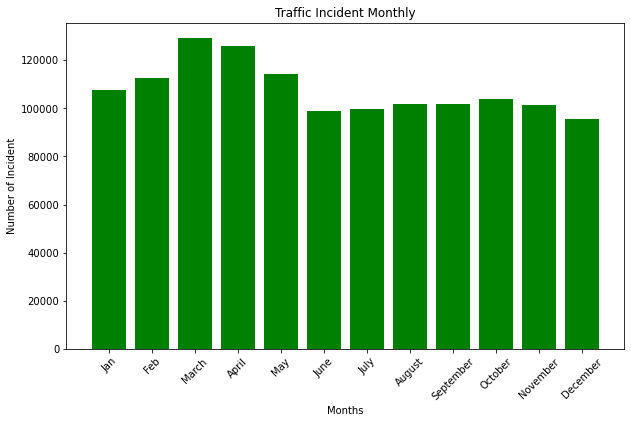

In [73]:
Months=[0]*traffic.shape[0]
for i in range(traffic.shape[0]):
    Months[i]=traffic.DateTime[i].month
    
Month=Counter(Months)
f=[0]*12

for i in range(12):
    f[i]=Month[i+1]
M = ['Jan','Feb','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(10,6))
plt.title("Traffic Incident Monthly")
plt.bar(M,f, color='g')
plt.xticks(rotation=45)
plt.xlabel("Months")
plt.ylabel("Number of Incident")
plt.show()

In [74]:
# This is for violation count
forecast_violation = pd.DataFrame(traffic[['Date']])
forecast_violation.columns = ['Date']
forecast_violation['No of violations'] = 1
# print(forecast_violation.head())

# Converting the Date into Datetime format
forecast_violation['Date'] = pd.to_datetime(forecast_violation.Date)

# sorting the date and resetting the index
forecast_violation = forecast_violation.sort_values(by = 'Date')
forecast_violation = forecast_violation.reset_index(drop = True)

forecast_violation_month = forecast_violation.resample('M', on = 'Date').sum()
print(forecast_violation_month.head())

# Creating a running sum of the violation of every month, this keeps the data on upward Trend
forecast_violation_cumsum = forecast_violation_month.cumsum()
print(forecast_violation_cumsum.head())

            No of violations
Date                        
2012-01-31             10253
2012-02-29             10342
2012-03-31             11624
2012-04-30             13174
2012-05-31             17397
            No of violations
Date                        
2012-01-31             10253
2012-02-29             20595
2012-03-31             32219
2012-04-30             45393
2012-05-31             62790


<function matplotlib.pyplot.show(close=None, block=None)>

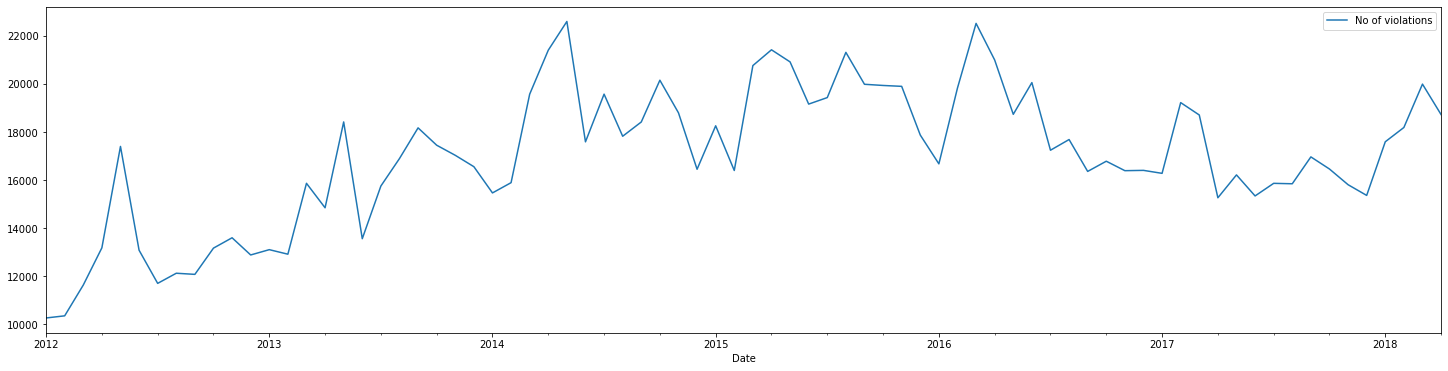

In [75]:
forecast_violation_month.plot(figsize=(25, 6))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

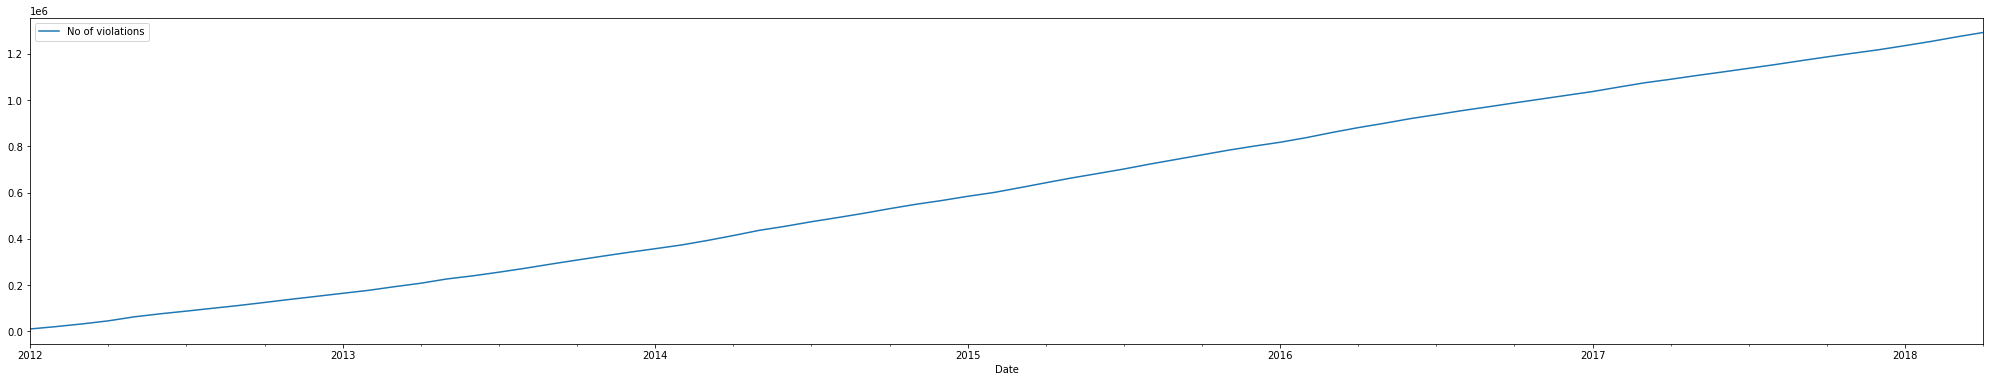

In [76]:
forecast_violation_cumsum.plot(figsize=(35, 6))
plt.show

In [77]:
import seaborn as sns

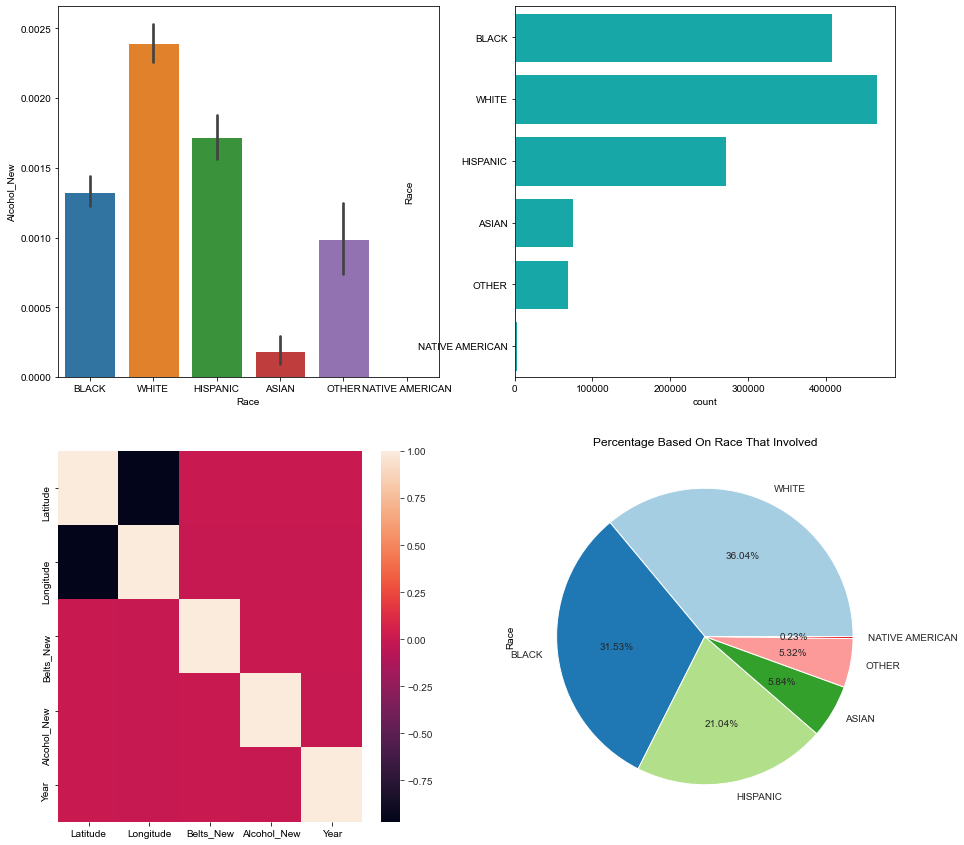

In [78]:
f, axes = plt.subplots(2,2, figsize = (15,15))
sns.set_style("darkgrid")

fig1 = sns.barplot(x="Race", y="Alcohol_New",
                  data = traffic, ax = axes[0,0])

# Calculate correlations
corr = traffic.corr()
# Heatmap
sns.heatmap(corr, ax=axes[1,0])

sns.countplot(y="Race", data=traffic, color="c", ax=axes[0,1])

colors=sns.color_palette('Paired',10)
pd.Series(traffic['Race']).value_counts().plot(kind='pie',colors=colors,
                                              title='Percentage Based On Race That Involved', autopct='%1.2f%%')
plt.show()



In [91]:
uber_review = pd.read_csv('C:\\Users\\xpro\\Downloads\\Uber_Ride_Reviews.csv')
uber_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ride_review  1344 non-null   object 
 1   ride_rating  1344 non-null   float64
 2   sentiment    1344 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 31.6+ KB


In [92]:
uber_review.dtypes

ride_review     object
ride_rating    float64
sentiment        int64
dtype: object

In [93]:
combine =[uber_review, traffic]
newdf=pd.concat(combine)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293743 entries, 0 to 1292398
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_review         1344 non-null     object        
 1   ride_rating         1344 non-null     float64       
 2   sentiment           1344 non-null     float64       
 3   Date                1292399 non-null  object        
 4   Time                1292399 non-null  object        
 5   Description         1292390 non-null  object        
 6   Latitude            1197045 non-null  float64       
 7   Longitude           1197045 non-null  float64       
 8   Accident            1292399 non-null  object        
 9   Belts               1292399 non-null  object        
 10  Personal Injury     1292399 non-null  object        
 11  Property Damage     1292399 non-null  object        
 12  Fatal               1292399 non-null  object        
 13  Commercial L

In [82]:
newdf['ride_rating'].value_counts()

1.0    1041
5.0     124
2.0      70
4.0      59
3.0      50
Name: ride_rating, dtype: int64

In [83]:
uber_review['review_length'] = uber_review['ride_review'].apply(len)
uber_review.head()

,ride_review,ride_rating,sentiment,review_length
0,I completed running New York Marathon requeste...,1.0,0,2259
1,My appointment time auto repairs required earl...,1.0,0,1147
2,Whether I using Uber ride service Uber Eats or...,1.0,0,661
3,Why hard understand I trying retrieve Uber cab...,1.0,0,445
4,I South Beach FL I staying major hotel ordered...,1.0,0,304


In [84]:
uber_review['sentiment'].value_counts()

0    1111
1     233
Name: sentiment, dtype: int64

In [85]:
uber_review.corr()

,ride_rating,sentiment,review_length
ride_rating,1.000000,0.950908,-0.156503
sentiment,0.950908,1.000000,-0.153692
review_length,-0.156503,-0.153692,1.000000


<AxesSubplot:xlabel='ride_rating', ylabel='review_length'>

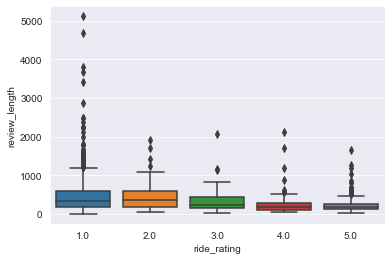

In [88]:
sns.boxplot(x=uber_review['ride_rating'], y=uber_review['review_length'], data=uber_review)